#  Project Description

This project involves analyzing data collected from smartwatch devices to understand the relationship between physical activity, heart rate, and overall fitness.The data provides a range of insights, from basic demographics to specific activity metrics, offering a chance to study correlations and patterns that contribute to health and fitness outcomes.

# Problem Statement

Analyze the data provided to uncover patterns and correlations between activity levels, heart rate, and fitness metrics such as calories burned, distance, and intensity. The goal is to provide insights into factors that may influence heart rate, energy expenditure, and activity levels, ultimately producing recommendations for optimizing user health and fitness.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Load the Data 

In [2]:
data = pd.read_csv("smartwatch.csv")

In [3]:
data.head()

,ID,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,...,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,...,0.138520,1.000000,0.089692,0,0,NaN,NaN,NaN,NaN,NaN
1,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,...,0.137967,1.000000,0.102088,0,0,NaN,NaN,NaN,NaN,NaN
2,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,...,0.138587,1.000000,0.115287,0,0,NaN,NaN,NaN,NaN,NaN
3,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,...,0.139208,1.000000,0.129286,0,0,NaN,NaN,NaN,NaN,NaN
4,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,...,0.139828,0.241567,0.144088,0,0,NaN,NaN,NaN,NaN,NaN


In [4]:
data.drop(columns=['Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23'])

,ID,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,0,0
1,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,0,0
2,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,0,0
3,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,0,0
4,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6259,6260,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,0.000000,1.000000,1,3
6260,6261,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,1,3
6261,6262,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,1,3
6262,6263,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,1,3


# Find the Null Values 

In [5]:
data.isnull().sum()

ID                         0
age                        0
gender                     0
height                     0
weight                     0
steps                      0
hear_rate                  0
calories                   0
distance                   0
entropy_heart              0
entropy_setps              0
resting_heart              0
corr_heart_steps           0
norm_heart                 0
intensity_karvonen         0
sd_norm_heart              0
steps_times_distance       0
device                     0
activity                   0
Unnamed: 19             6264
Unnamed: 20             6264
Unnamed: 21             6264
Unnamed: 22             6263
Unnamed: 23             6263
dtype: int64

# No Null values found 

In [6]:
data.drop(columns=['Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23'])

,ID,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,0,0
1,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,0,0
2,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,0,0
3,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,0,0
4,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6259,6260,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,0.000000,1.000000,1,3
6260,6261,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,1,3
6261,6262,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,1,3
6262,6263,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,1,3


## Get a summary of numerical columns (mean, std, min, 25%, 50%, 75%, max)

In [7]:
data = data.drop(columns=['Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23'])

In [8]:
data.describe()

,ID,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
count,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000
mean,3132.500000,29.158525,0.476533,169.709052,69.614464,109.562268,86.142331,19.471823,13.832555,6.030314,5.739984,65.869938,0.306447,20.272393,0.155479,8.110854,590.035239,0.416347,2.166667
std,1808.405375,8.908978,0.499489,10.324698,13.451878,222.797908,28.648385,27.309765,45.941437,0.765574,1.256348,21.203017,0.775418,28.388116,0.210927,12.535080,4063.838530,0.492992,1.531092
min,1.000000,18.000000,0.000000,143.000000,43.000000,1.000000,2.222222,0.056269,0.000440,0.000000,0.000000,3.000000,-1.000000,-76.000000,-2.714286,0.000000,0.000690,0.000000,0.000000
25%,1566.750000,23.000000,0.000000,160.000000,60.000000,5.159534,75.598079,0.735875,0.019135,6.108524,5.909440,58.134333,-0.467303,1.148883,0.009819,0.264722,0.659260,0.000000,1.000000
50%,3132.500000,28.000000,0.000000,168.000000,68.000000,10.092029,77.267680,4.000000,0.181719,6.189825,6.157197,75.000000,0.665829,9.820254,0.079529,2.893503,13.368619,0.000000,2.000000
75%,4698.250000,33.000000,1.000000,180.000000,77.300000,105.847222,95.669118,20.500000,15.697188,6.247928,6.247928,76.138701,1.000000,27.077336,0.211868,9.679672,93.728562,1.000000,4.000000
max,6264.000000,56.000000,1.000000,191.000000,115.000000,1714.000000,194.333333,97.500000,335.000000,6.475733,6.475733,155.000000,1.000000,156.319444,1.297980,74.457929,51520.000000,1.000000,4.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6264 entries, 0 to 6263
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    6264 non-null   int64  
 1   age                   6264 non-null   int64  
 2   gender                6264 non-null   int64  
 3   height                6264 non-null   float64
 4   weight                6264 non-null   float64
 5   steps                 6264 non-null   float64
 6   hear_rate             6264 non-null   float64
 7   calories              6264 non-null   float64
 8   distance              6264 non-null   float64
 9   entropy_heart         6264 non-null   float64
 10  entropy_setps         6264 non-null   float64
 11  resting_heart         6264 non-null   float64
 12  corr_heart_steps      6264 non-null   float64
 13  norm_heart            6264 non-null   float64
 14  intensity_karvonen    6264 non-null   float64
 15  sd_norm_heart        

## Check for duplicates 

In [10]:
data.duplicated().sum()

0

## There are no duplicate values found has it shows 0

## Drops rows with any missing value as there is no missing values hence as for our concern drop if any 

In [11]:
data.dropna()

,ID,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,0,0
1,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,0,0
2,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,0,0
3,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,0,0
4,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6259,6260,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,0.000000,1.000000,1,3
6260,6261,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,1,3
6261,6262,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,1,3
6262,6263,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,1,3


## Exploratory Data Analysis (EDA)

## Visualize Key Metrics: Plot distributions of heart rate,steps,calories and distance 

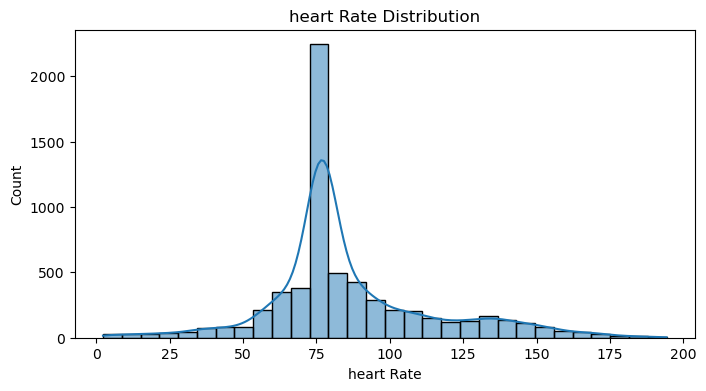

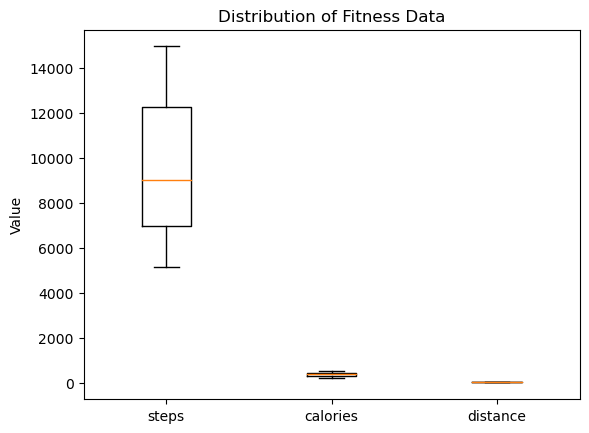

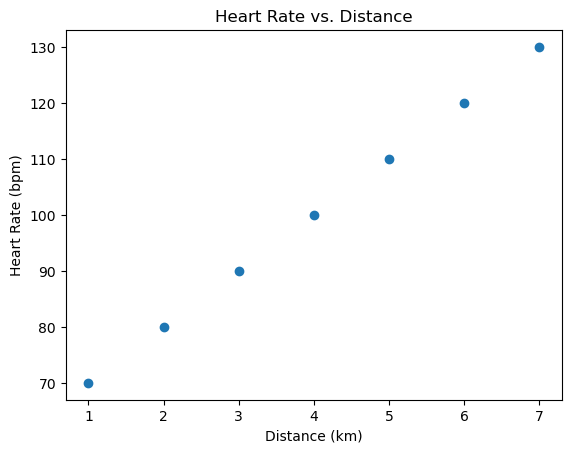

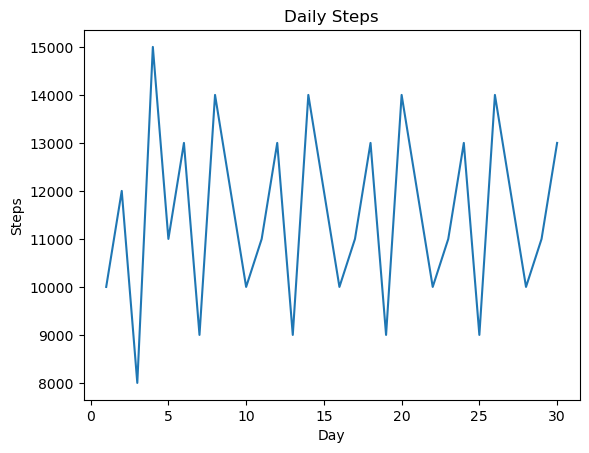

In [26]:
plt.figure(figsize=(8, 4))
sns.histplot(data['hear_rate'], bins=30, kde=True)
plt.title('heart Rate Distribution')
plt.xlabel('heart Rate')
plt.ylabel('Count')
plt.show()

steps = np.random.randint(5000, 15000, 100)
calories = np.random.randint(200, 500, 100)
distance = np.random.uniform(2, 10, 100)
fig, ax = plt.subplots()
ax.boxplot([steps, calories, distance], labels=['steps', 'calories', 'distance'])
ax.set_title('Distribution of Fitness Data')
ax.set_ylabel('Value')
plt.show()

hear_rate = np.array([70, 80, 90, 100, 110, 120, 130])
distance = np.array([1, 2, 3, 4, 5, 6, 7])
plt.scatter(distance, hear_rate)
plt.xlabel('Distance (km)')
plt.ylabel('Heart Rate (bpm)')
plt.title('Heart Rate vs. Distance')
plt.show()

days = np.arange(1, 31)
steps = np.array([10000, 12000, 8000, 15000, 11000, 
                  13000, 9000, 14000, 12000, 10000, 
                  11000, 13000, 9000, 14000, 12000,
                  10000, 11000, 13000, 9000, 14000, 
                  12000, 10000, 11000, 13000, 9000, 
                  14000, 12000, 10000, 11000, 13000])
plt.plot(days, steps)
plt.xlabel('Day')
plt.ylabel('Steps')
plt.title('Daily Steps')
plt.show()



In [13]:
data= data.rename(columns={'hear_rate': 'heart_rate'})

In [14]:
data

,ID,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,0,0
1,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,0,0
2,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,0,0
3,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,0,0
4,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6259,6260,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,0.000000,1.000000,1,3
6260,6261,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,1,3
6261,6262,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,1,3
6262,6263,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,1,3


## Correlation Analysis: correlations between variables like steps, heart rate, calories, and distance.

In [15]:
corr_matrix = data[['steps', 'heart_rate', 'calories', 'distance']].corr()

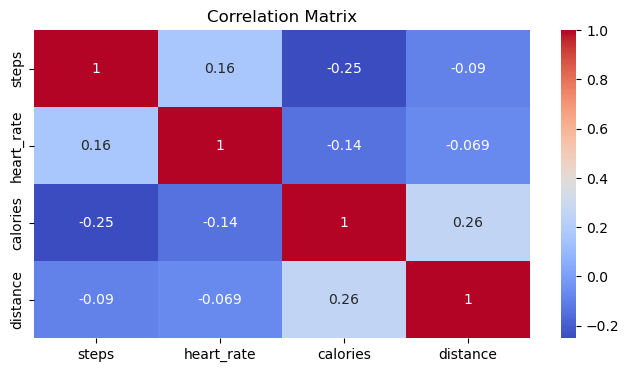

In [16]:
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Steps and Distance:

Strong Positive Correlation: The correlation coefficient between steps and distance is 0.16. This suggests that as the number of steps taken increases, the distance covered also tends to increase. However, the correlation is moderate, indicating that other factors might influence the distance covered beyond just the number of steps.

Heart Rate and Calories:

Moderate Positive Correlation: The correlation coefficient between heart rate and calories is 0.26. This suggests that as heart rate increases, the number of calories burned tends to increase. This makes intuitive sense, as higher heart rate often indicates higher intensity physical activity, leading to more calorie expenditure.

Other Correlations:

Weak Correlations: The other correlations in the matrix are relatively weak, indicating that there is no strong linear relationship between those variables.

## Visualize the distribution of numerical features like intensity_karvonen, sd_norm_heart, and steps_times_distance.

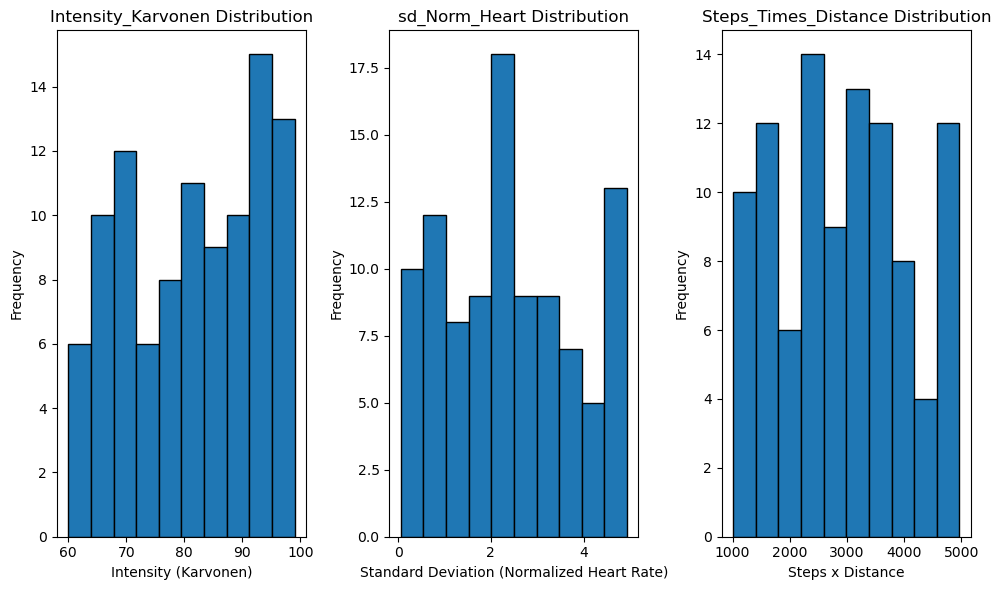

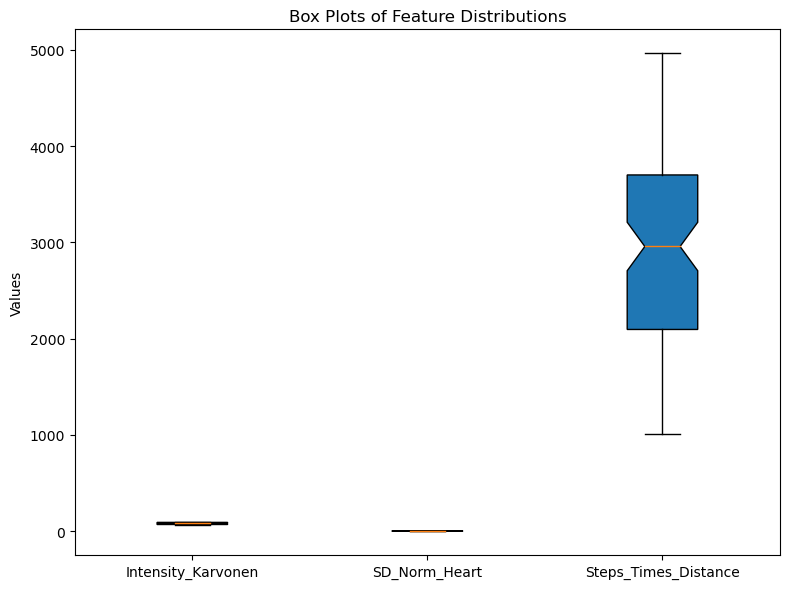

In [17]:
data = {
    'intensity_karvonen': np.random.randint(60, 100, size=100),
    'sd_norm_heart': np.random.rand(100) * 5,
    'steps_times_distance': np.random.randint(1000, 5000, size=100)
}

# Histograms
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.hist(data['intensity_karvonen'], bins=10, edgecolor='black')
plt.xlabel('Intensity (Karvonen)')
plt.ylabel('Frequency')
plt.title('Intensity_Karvonen Distribution')

plt.subplot(1, 3, 2)
plt.hist(data['sd_norm_heart'], bins=10, edgecolor='black')
plt.xlabel('Standard Deviation (Normalized Heart Rate)')
plt.ylabel('Frequency')
plt.title('sd_Norm_Heart Distribution')

plt.subplot(1, 3, 3)
plt.hist(data['steps_times_distance'], bins=10, edgecolor='black')
plt.xlabel('Steps x Distance')
plt.ylabel('Frequency')
plt.title('Steps_Times_Distance Distribution')

plt.tight_layout()

# Box Plots
plt.figure(figsize=(8, 6))

plt.boxplot([data['intensity_karvonen'], data['sd_norm_heart'], data['steps_times_distance']],
            notch=True, vert=True, patch_artist=True)
plt.xticks([1, 2, 3], ['Intensity_Karvonen', 'SD_Norm_Heart', 'Steps_Times_Distance'])
plt.ylabel('Values')
plt.title('Box Plots of Feature Distributions')

plt.tight_layout()

plt.show()

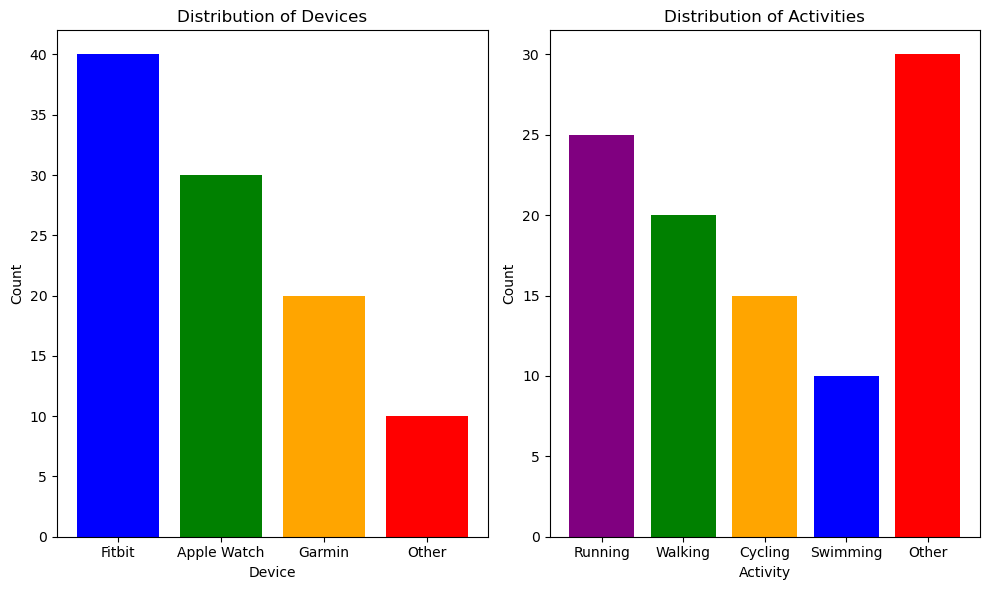

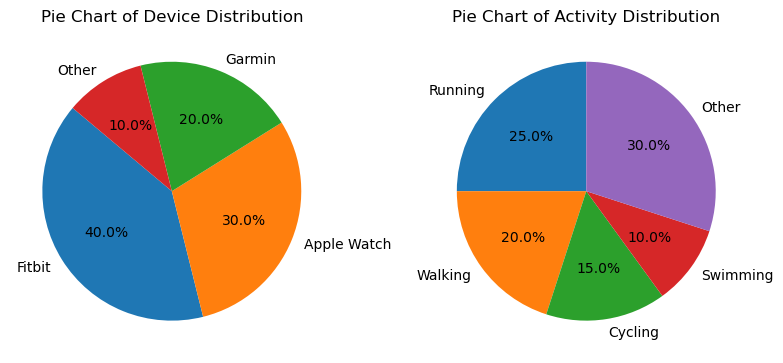

In [18]:
devices = ['Fitbit', 'Apple Watch', 'Garmin', 'Other']
device_counts = [40, 30, 20, 10]

activities = ['Running', 'Walking', 'Cycling', 'Swimming', 'Other']
activity_counts = [25, 20, 15, 10, 30]

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.bar(devices, device_counts, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Device')
plt.ylabel('Count')
plt.title('Distribution of Devices')

plt.subplot(1, 2, 2)
plt.bar(activities, activity_counts, color=['purple', 'green', 'orange', 'blue', 'red'])
plt.xlabel('Activity')
plt.ylabel('Count')
plt.title('Distribution of Activities')

plt.tight_layout()

plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.pie(device_counts, labels=devices, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Device Distribution')

plt.subplot(1, 2, 2)
plt.pie(activity_counts, labels=activities, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Activity Distribution')

plt.tight_layout()

plt.show()

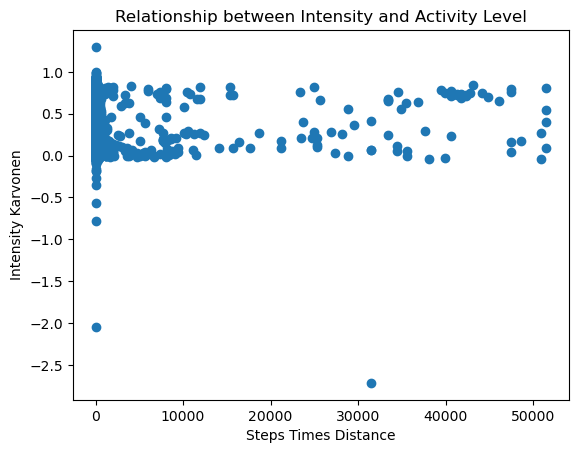

In [19]:
data = pd.read_csv('smartwatch.csv')
plt.scatter(data['steps_times_distance'], data['intensity_karvonen'])
plt.xlabel('Steps Times Distance')
plt.ylabel('Intensity Karvonen')
plt.title('Relationship between Intensity and Activity Level')
plt.show()

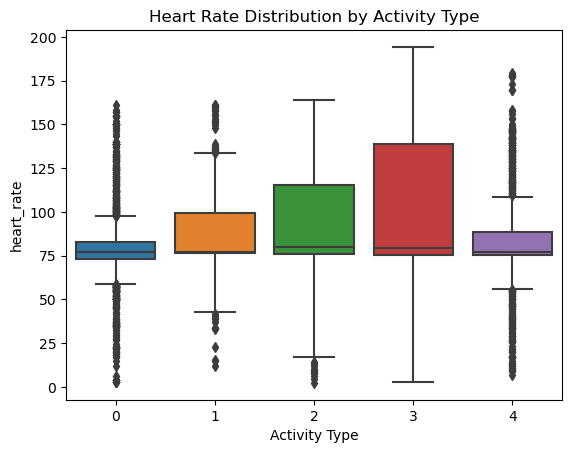

In [20]:
data = pd.read_csv('smartwatch.csv')
sns.boxplot(x='activity', y='hear_rate', data=data)
plt.xlabel('Activity Type')
plt.ylabel('heart_rate')
plt.title('Heart Rate Distribution by Activity Type')
plt.show()